In [1]:
import pandas as pd
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10,8]
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv("C:\\Users\\suraj\\Desktop\\Autonomous Navi\\sensor_data.csv")

In [3]:
data.head()

,Linear_Acceleration.x,Linear_Acceleration.y,Linear_Acceleration.z,Rotation_Vector.x,Rotation_Vector.y,Rotation_Vector.z,GPS.lat,GPS.long,GPS.alt
0,0.864224,0.229731,1.661541,0.012974,0.164249,0.890385,13.017355,77.568168,857
1,0.323839,0.236918,1.652619,0.015850,0.160558,0.890426,13.017355,77.568168,857
2,-1.202685,0.232506,0.568786,0.015416,0.157596,0.889407,13.017355,77.568168,857
3,-1.450808,0.331171,-0.429112,0.012804,0.160722,0.888201,13.017355,77.568168,857
4,-0.395831,0.194027,-1.022462,0.013176,0.163260,0.887135,13.017355,77.568168,857


In [4]:
data_main = data.iloc[:, :3]

In [5]:
np.mean(data_main , axis = 0)

Linear_Acceleration.x   -0.053908
Linear_Acceleration.y   -0.205760
Linear_Acceleration.z    0.032192
dtype: float64

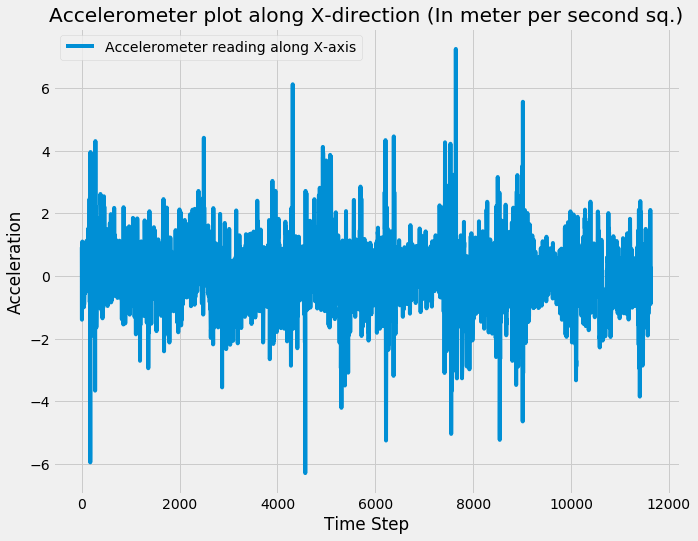

In [15]:
# Making Data Zero Mean and Plotting
x1 = data_main['Linear_Acceleration.x']
data_main['Linear_Acceleration.x'] =  data_main['Linear_Acceleration.x'] - x1.mean()
plt.plot(x1, label = 'Accelerometer reading along X-axis')
plt.legend()
plt.xlabel ('Time Step')
plt.ylabel ('Acceleration')
plt.title('Accelerometer plot along X-direction (In meter per second sq.)')
plt.show()

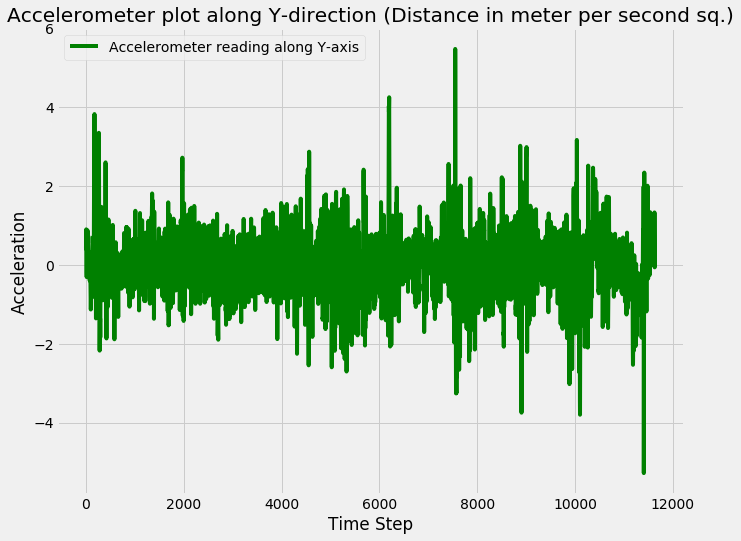

In [16]:
# Making Data Zero Mean and Plotting
x1 = data_main['Linear_Acceleration.y']
data_main['Linear_Acceleration.y'] =  data_main['Linear_Acceleration.y'] - x1.mean()
plt.plot(x1,'g', label = 'Accelerometer reading along Y-axis')
plt.legend()
plt.xlabel ('Time Step')
plt.ylabel ('Acceleration')
plt.title('Accelerometer plot along Y-direction (Distance in meter per second sq.)')
plt.show()

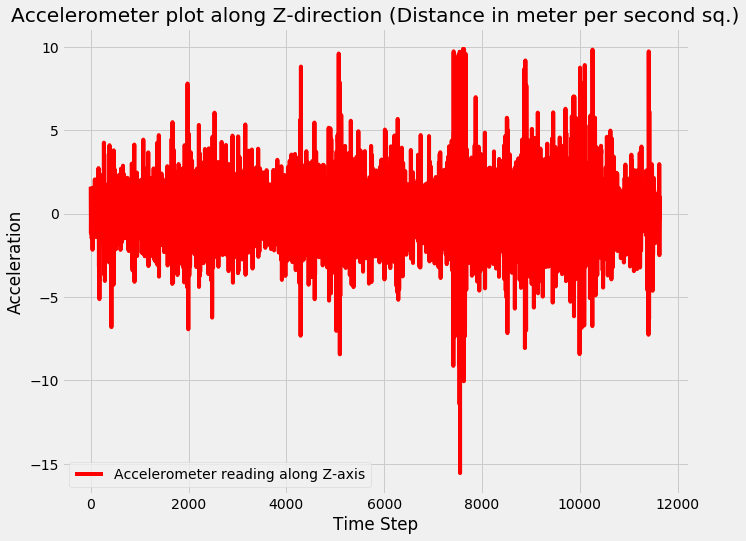

In [17]:
# Making Data Zero Mean and Plotting
x1 = data_main['Linear_Acceleration.z']
data_main['Linear_Acceleration.z'] =  data_main['Linear_Acceleration.z'] - x1.mean()
plt.plot(x1, 'r', label = 'Accelerometer reading along Z-axis')
plt.legend()
plt.xlabel ('Time Step')
plt.ylabel ('Acceleration')
plt.title('Accelerometer plot along Z-direction (Distance in meter per second sq.)')
plt.show()

# Velocity

In [24]:
data_main['vpx'] = [np.sum(data_main['Linear_Acceleration.x'].iloc[:x])*0.01 for x in range(len(data_main['Linear_Acceleration.x']))]

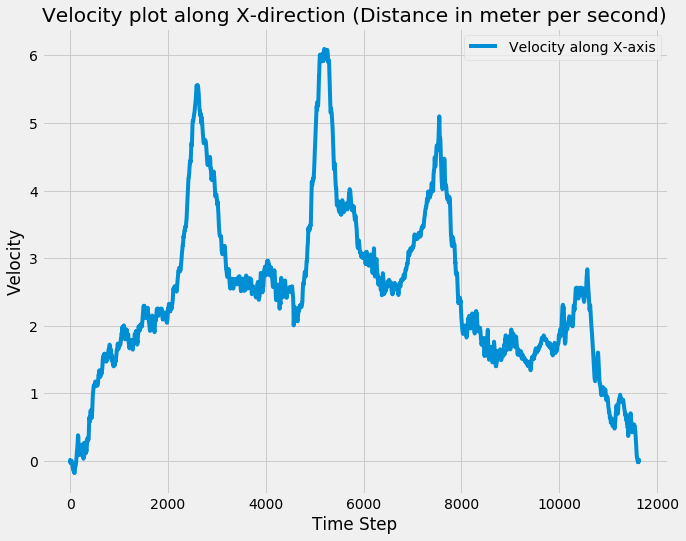

In [25]:
# Plot of velocity variation along X direction
plt.plot(data_main['vpx'], label = 'Velocity along X-axis')
plt.legend()
plt.xlabel ('Time Step')
plt.ylabel ('Velocity')
plt.title('Velocity plot along X-direction (Distance in meter per second)')
plt.show()

In [26]:
data_main['vpy'] = [np.sum(data_main['Linear_Acceleration.y'].iloc[:x])*0.01 for x in range(len(data_main['Linear_Acceleration.x']))]

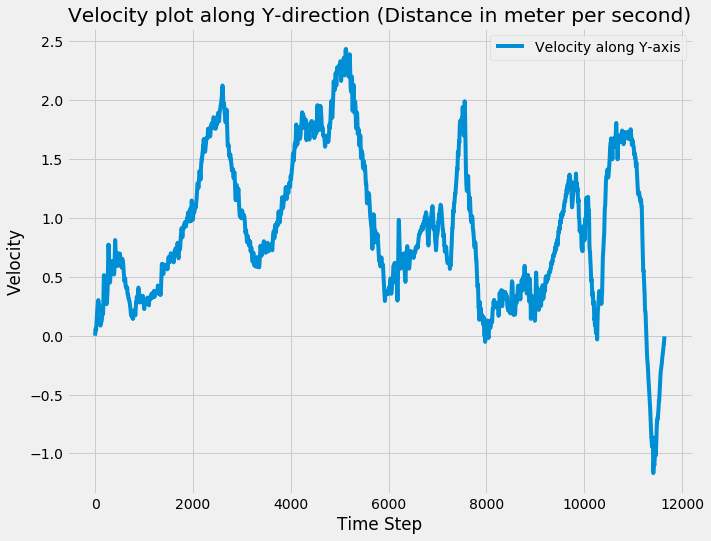

In [27]:
# Plot of velocity variation along Y direction
plt.plot(data_main['vpy'], label = 'Velocity along Y-axis')
plt.legend()
plt.xlabel ('Time Step')
plt.ylabel ('Velocity')
plt.title('Velocity plot along Y-direction (Distance in meter per second)')
plt.show()

In [28]:
data_main['vpz'] = [np.sum(data_main['Linear_Acceleration.z'].iloc[:x])*0.01 for x in range(len(data_main['Linear_Acceleration.x']))]

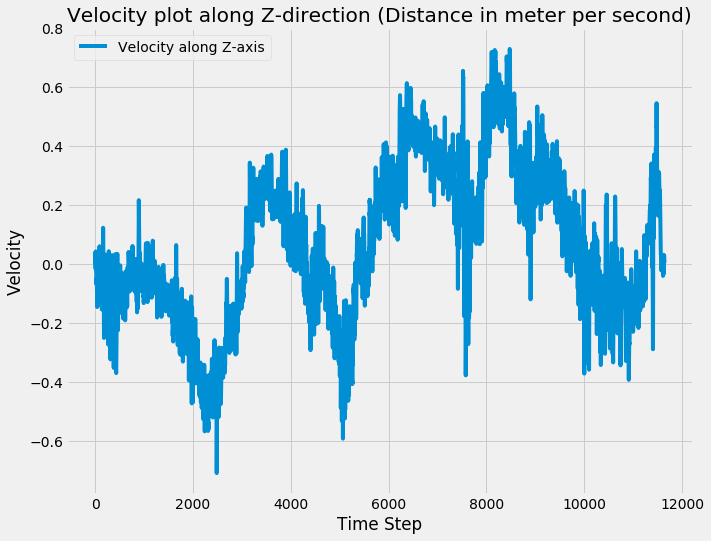

In [29]:
# Plot of velocity variation along Z direction
plt.plot(data_main['vpz'], label = 'Velocity along Z-axis')
plt.legend()
plt.xlabel ('Time Step')
plt.ylabel ('Velocity')
plt.title('Velocity plot along Z-direction (Distance in meter per second)')
plt.show()

# Distance

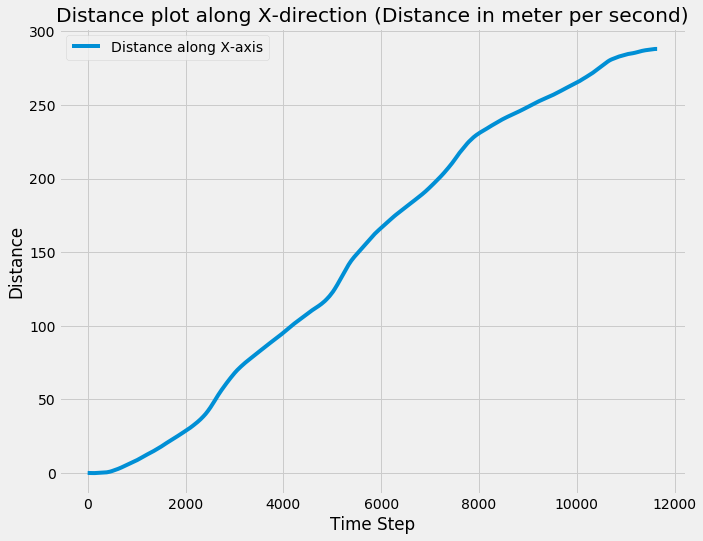

In [31]:
# Distance Plot along X-axis
data_main['px'] = [np.sum(data_main['vpx'].iloc[:x])*0.01 for x in range(len(data_main['vpx']))]
plt.plot(data_main['px'], label = 'Distance along X-axis')
plt.legend()
plt.xlabel ('Time Step')
plt.ylabel ('Distance')
plt.title('Distance plot along X-direction (Distance in meter per second)')
plt.show()

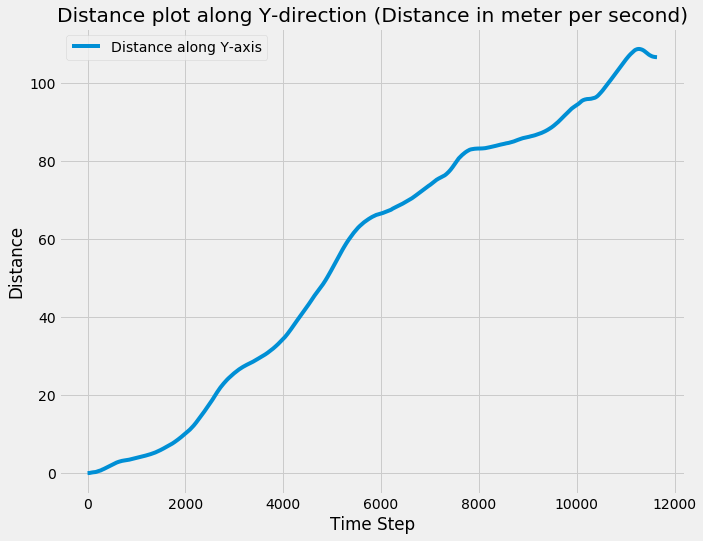

In [32]:
# Distance Plot along Y-axis
data_main['py'] = [np.sum(data_main['vpy'].iloc[:x])*0.01 for x in range(len(data_main['vpx']))]
plt.plot(data_main['py'], label = 'Distance along Y-axis')
plt.legend()
plt.xlabel ('Time Step')
plt.ylabel ('Distance')
plt.title('Distance plot along Y-direction (Distance in meter per second)')
plt.show()

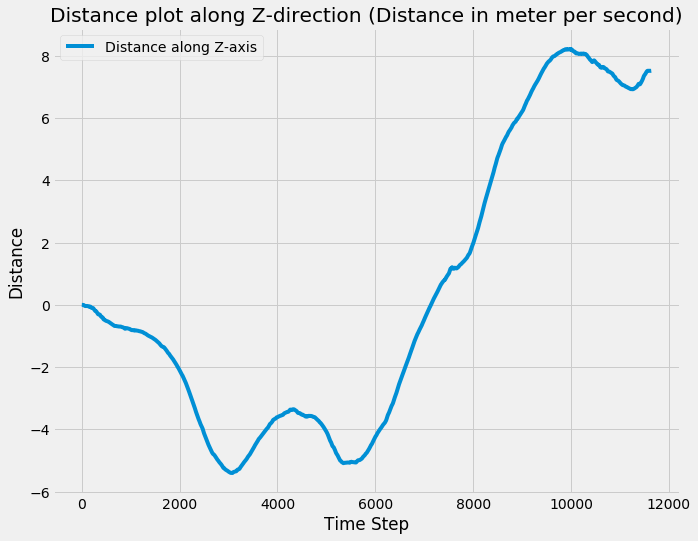

In [33]:
# Distance Plot along Z-axis
data_main['pz'] = [np.sum(data_main['vpz'].iloc[:x])*0.01 for x in range(len(data_main['vpx']))]
plt.plot(data_main['pz'], label = 'Distance along Z-axis')
plt.legend()
plt.xlabel ('Time Step')
plt.ylabel ('Distance')
plt.title('Distance plot along Z-direction (Distance in meter per second)')
plt.show()

# Rotational Sensor Plot

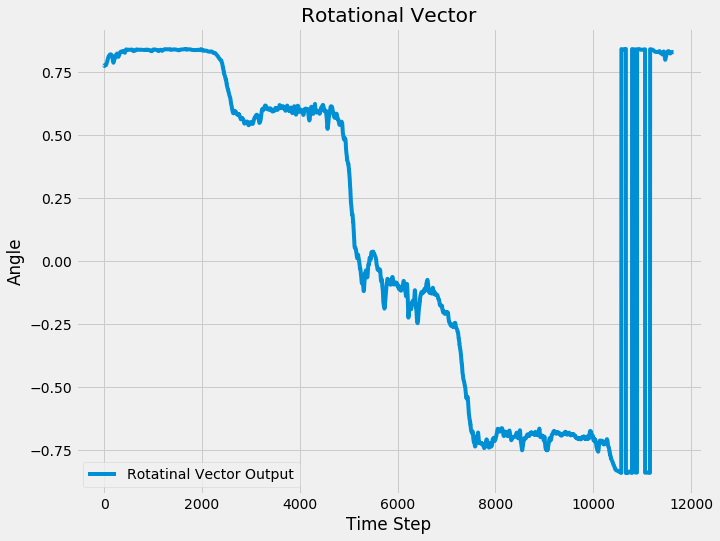

In [34]:
# Sensor Output plot
plt.plot(np.sin(data['Rotation_Vector.z']), label = 'Rotatinal Vector Output')
plt.legend()
plt.xlabel ('Time Step')
plt.ylabel ('Angle(rad)')
plt.title('Rotational Vector')
plt.show()

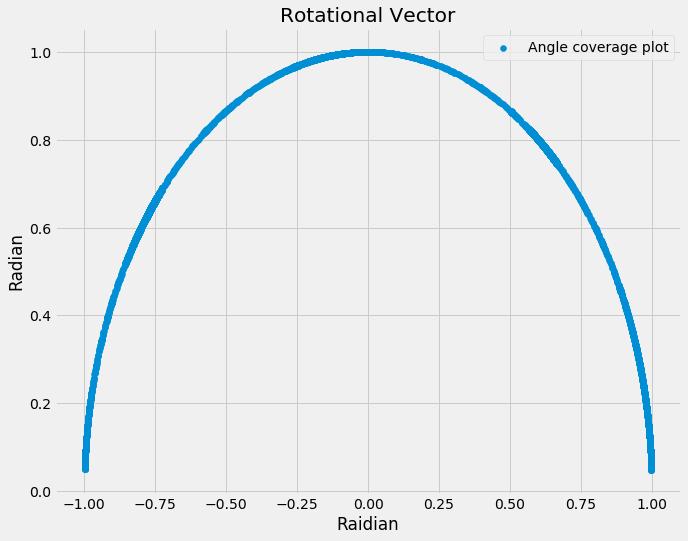

In [38]:
# Sensor angle coverage plot
plt.scatter(data['Rotation_Vector.z'], np.sqrt(1 - np.square(data['Rotation_Vector.z'])), label = 'Angle coverage plot')
plt.legend()
plt.xlabel ('Raidian')
plt.ylabel ('Radian')
plt.title('Rotational Vector')
plt.show()

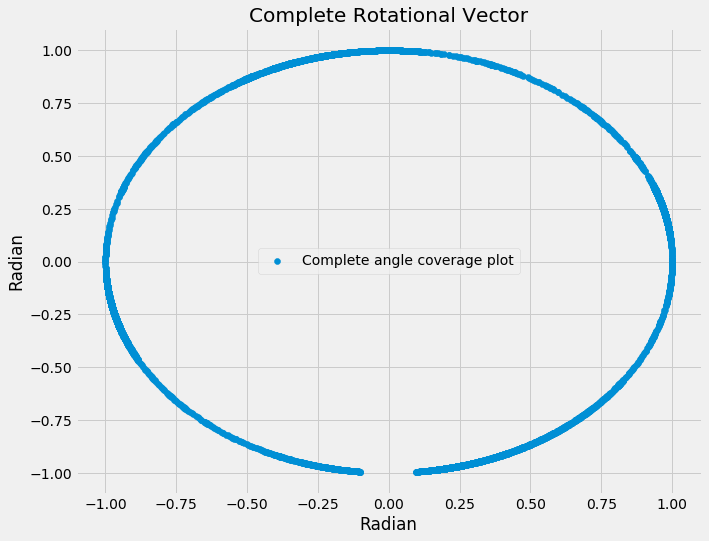

In [39]:
# Complete Sensor coverage Plot
plt.scatter(np.sin(2*np.arcsin(data['Rotation_Vector.z'])), np.cos(2*np.arccos(np.sqrt(1 - np.square(data['Rotation_Vector.z']))))
,label = 'Complete angle coverage plot')
plt.legend()
plt.xlabel ('Radian')
plt.ylabel ('Radian')
plt.title('Complete Rotational Vector')
plt.show()

# Final Trajectory Plot

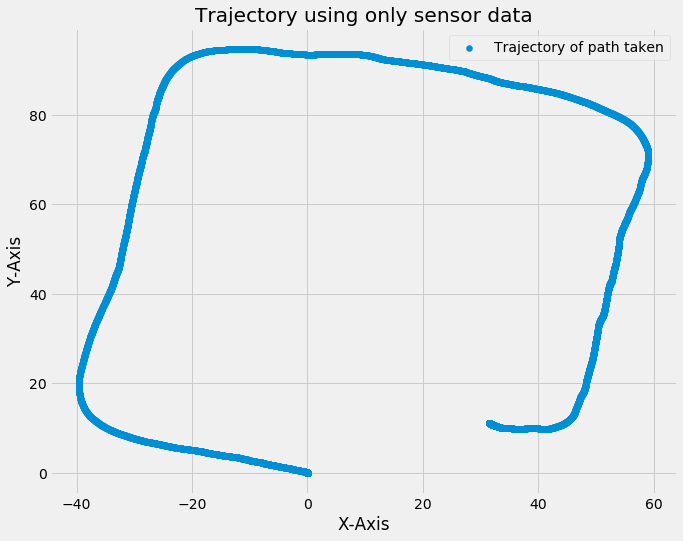

In [40]:
# Plotting final trajectory using previous sensor outputs
coor_x_temp = np.multiply(data_main['vpx']*0.01 , np.sin(2*np.arcsin(data['Rotation_Vector.z'])))
coor_y_temp = np.multiply(data_main['vpx']*0.01 , np.cos(2*np.arcsin(data['Rotation_Vector.z'])))
coor_x = [np.sum(coor_x_temp[:x]) for x in range(len(coor_x_temp))]
coor_y = [np.sum(coor_y_temp[:x]) for x in range(len(coor_y_temp))]
plt.scatter(coor_y, coor_x, label = 'Trajectory of path taken')
plt.legend()
plt.xlabel ('X-Axis')
plt.ylabel ('Y-Axis')
plt.title('Trajectory using only sensor data')
plt.show()